In [10]:
import cv2
from matplotlib import pyplot as plt

In [11]:
plt.figure(figsize=(12, 12))


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [ ]:
img = cv2.imread('carcode5.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(img_gray, (3, 3), 0, 0, cv2.BORDER_DEFAULT)
img_sobel = cv2.Sobel(img_median, cv2.CV_8U, 1, 0,  ksize = 3)
ret, img_binary = cv2.threshold(img_sobel, 170, 255, cv2.THRESH_BINARY)

plt.imshow(img_binary)
plt.show()

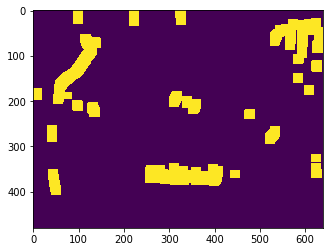

In [15]:
# 膨胀和腐蚀操作的核函数
element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 6))
# 膨胀一次，让轮廓突出
img_dilation = cv2.dilate(img_binary, element2, iterations = 1)
# 腐蚀一次，去掉细节
img_erosion = cv2.erode(img_dilation, element1, iterations = 1)
# 再次膨胀，让轮廓明显一些
img_dilation2 = cv2.dilate(img_erosion, element2,iterations = 3)

plt.imshow(img_dilation2)
plt.show()

In [20]:
def findPlateNumberRegion(img):
    region = []
    # 查找轮廓
    contours,hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # 筛选面积小的
    for i in range(len(contours)):
        cnt = contours[i]
        # 计算该轮廓的面积
        area = cv2.contourArea(cnt)

        # 面积小的都筛选掉
        if (area < 2000):
            continue

        # 轮廓近似，作用很小
        epsilon = 0.001 * cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)

        # 找到最小的矩形，该矩形可能有方向
        rect = cv2.minAreaRect(cnt)
        print("rect is: ")
        print(rect)

        # box是四个点的坐标
        box = cv2.cv.BoxPoints(rect)
        box = np.int0(box)

        # 计算高和宽
        height = abs(box[0][1] - box[2][1])
        width = abs(box[0][0] - box[2][0])

        # 车牌正常情况下长高比在2.7-5之间
        ratio =float(width) / float(height)
        if (ratio > 5 or ratio < 2):
            continue

        region.append(box)

    return region

reg = findPlateNumberRegion(img_dilation2)

rect is: 
((333.021484375, 361.3844909667969), (47.97081756591797, 172.17434692382812), -88.00211334228516)


AttributeError: module 'cv2.cv2' has no attribute 'BoxPoints'

In [21]:
# 用绿线画出这些找到的轮廓
for box in region:
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)
ys = [box[0, 1], box[1, 1], box[2, 1], box[3, 1]]
xs = [box[0, 0], box[1, 0], box[2, 0], box[3, 0]]
ys_sorted_index = np.argsort(ys)
xs_sorted_index = np.argsort(xs)

x1 = box[xs_sorted_index[0], 0]
x2 = box[xs_sorted_index[3], 0]

y1 = box[ys_sorted_index[0], 1]
y2 = box[ys_sorted_index[3], 1]

img_org2 = img.copy()
img_plate = img_org2[y1:y2, x1:x2]

NameError: name 'region' is not defined